## дз начинается здесь

In [79]:
import urllib.request
import json

j = 0
post_id = {}

req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-42923159&count=200&offset={}&v=5.74&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j)) 
try:
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    for i in range(200):
        post_id [data ['response'] ['items'] [i] ['text']]= data ['response'] ['items'] [i] ['id']
        with open ('MRZLK_posts.txt', 'a', encoding = 'utf-8') as f: 
            f.write(data ['response'] ['items'] [i] ['text'])
    j += 100
    req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-42923159&count=200&offset={}&v=5.74&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j)) 
    #if i == 200: 
        #print('done')
        #break
    #else:
        #continue 
except:
    j = 0

In [80]:
j = 0
comm = []
post_comm = {}
comm_from_id = {}
for k, v in post_id.items():
    try:
        req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-42923159&count=200&offset={}&v=5.74&post_id={}&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j,v)) 
        while req:
            response = urllib.request.urlopen(req) 
            result = response.read().decode('utf-8')
            data = json.loads(result) 
            for i in range (200): 
                comm.append(data ['response'] ['items'] [i] ['text'])
                comm_from_id[data ['response'] ['items'] [i] ['text']] = data ['response'] ['items'] [i] ['from_id']
                with open ('MRZLK_comments.txt', 'a', encoding = 'utf-8') as f: 
                    f.write(data ['response'] ['items'] [i] ['text'])
            j += 100
            req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-42923159&count=200&offset={}&v=5.74&post_id={}&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j,v)) 
    except:
        post_comm [k] = comm
        comm = []
        j = 0

In [81]:
sr = 0
kol = 0 
length_comm = 0
length_post = 0
len_post__srlen_comm = {}
for k,v in post_comm.items():
    for comm in v: 
        length_comm += len(comm.split())
        kol += 1
    length_post = len(k.split())
    sr = length_comm/kol
    len_post__srlen_comm[length_post] = sr
    sr = 0
    kol = 0 
    length_comm = 0
    length_post = 0

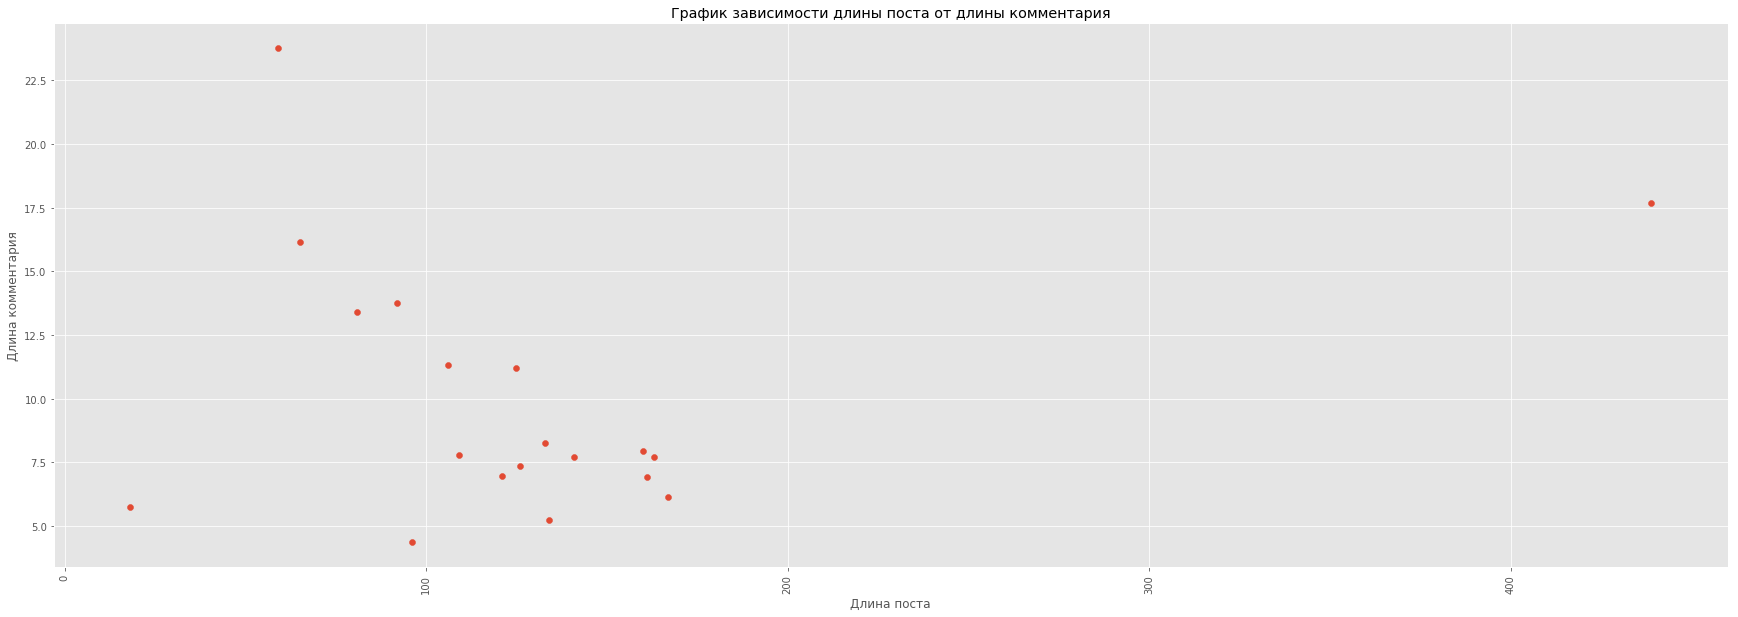

In [63]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

x = []
y = []

for k,v in len_post__srlen_comm.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title ('График зависимости длины поста от длины комментария')
plt.xlabel('Длина поста')
plt.ylabel('Длина комментария')
plt.scatter(x,y)
plt.savefig('graph_post_comm.png', format='png', dpi=100)

In [82]:
comm_age = {}
comm_city = {}
for k,v in comm_from_id.items():
    req = urllib.request.Request('https://api.vk.com/method/users.get?user_id={}&fields=bdate,city&v=5.74&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(v)) 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    try: 
        if 'bdate' in data ['response'] [0]: 
            b = data ['response'] [0] ['bdate'].split('.')
            age = 2018-int(b[2])
            comm_age [k] = age
    except:  
        continue
    try: 
        if 'city' in data ['response'] [0]: 
            city = data ['response'] [0] ['city'] ['title']
            comm_city [k] = city
    except: 
        continue

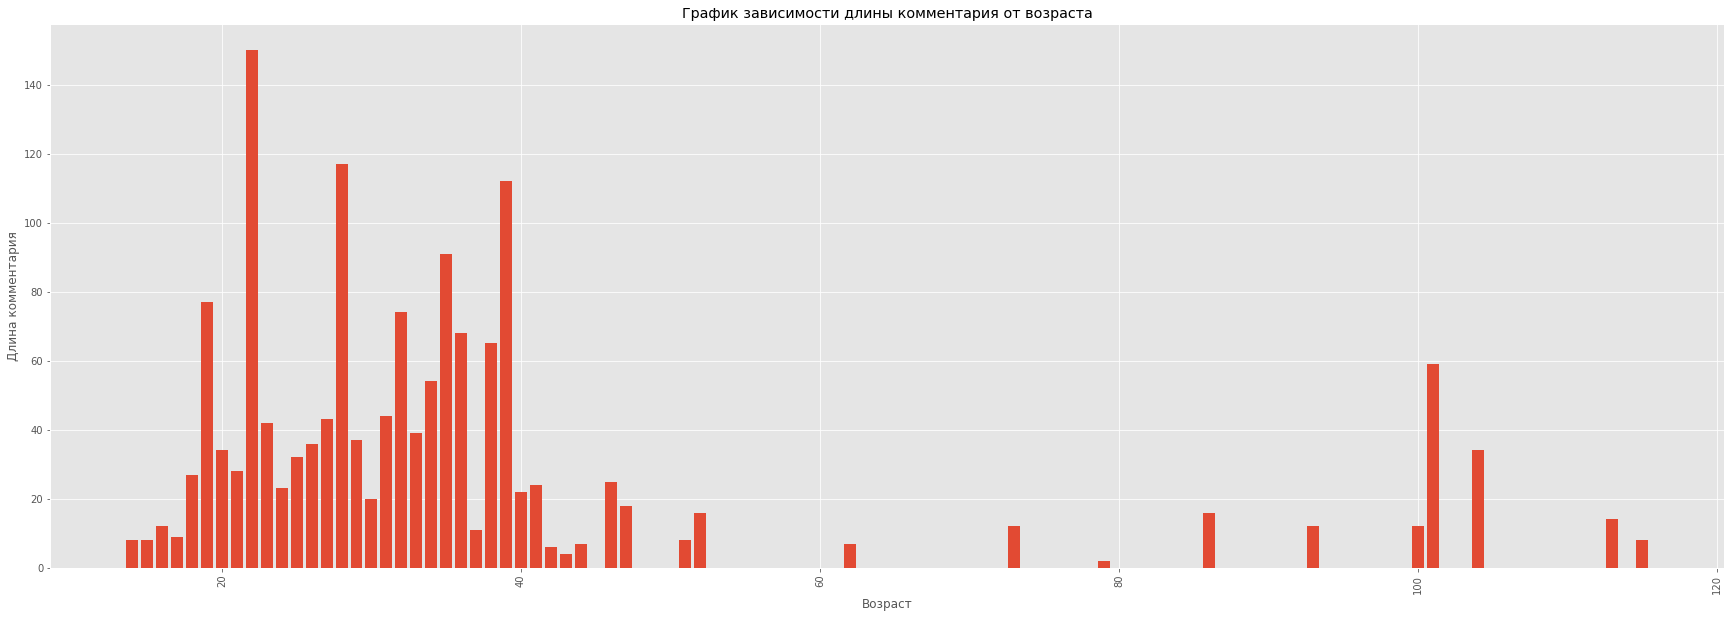

In [65]:
x = []
y = []

for k,v in comm_age.items():
    length = len(k.split())
    y.append(length)
    x.append(v)
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title ('График зависимости длины комментария от возраста')
plt.ylabel('Длина комментария')
plt.xlabel('Возраст')
plt.bar(x,y)
plt.savefig('graph_comm_age.png', format='png', dpi=100)

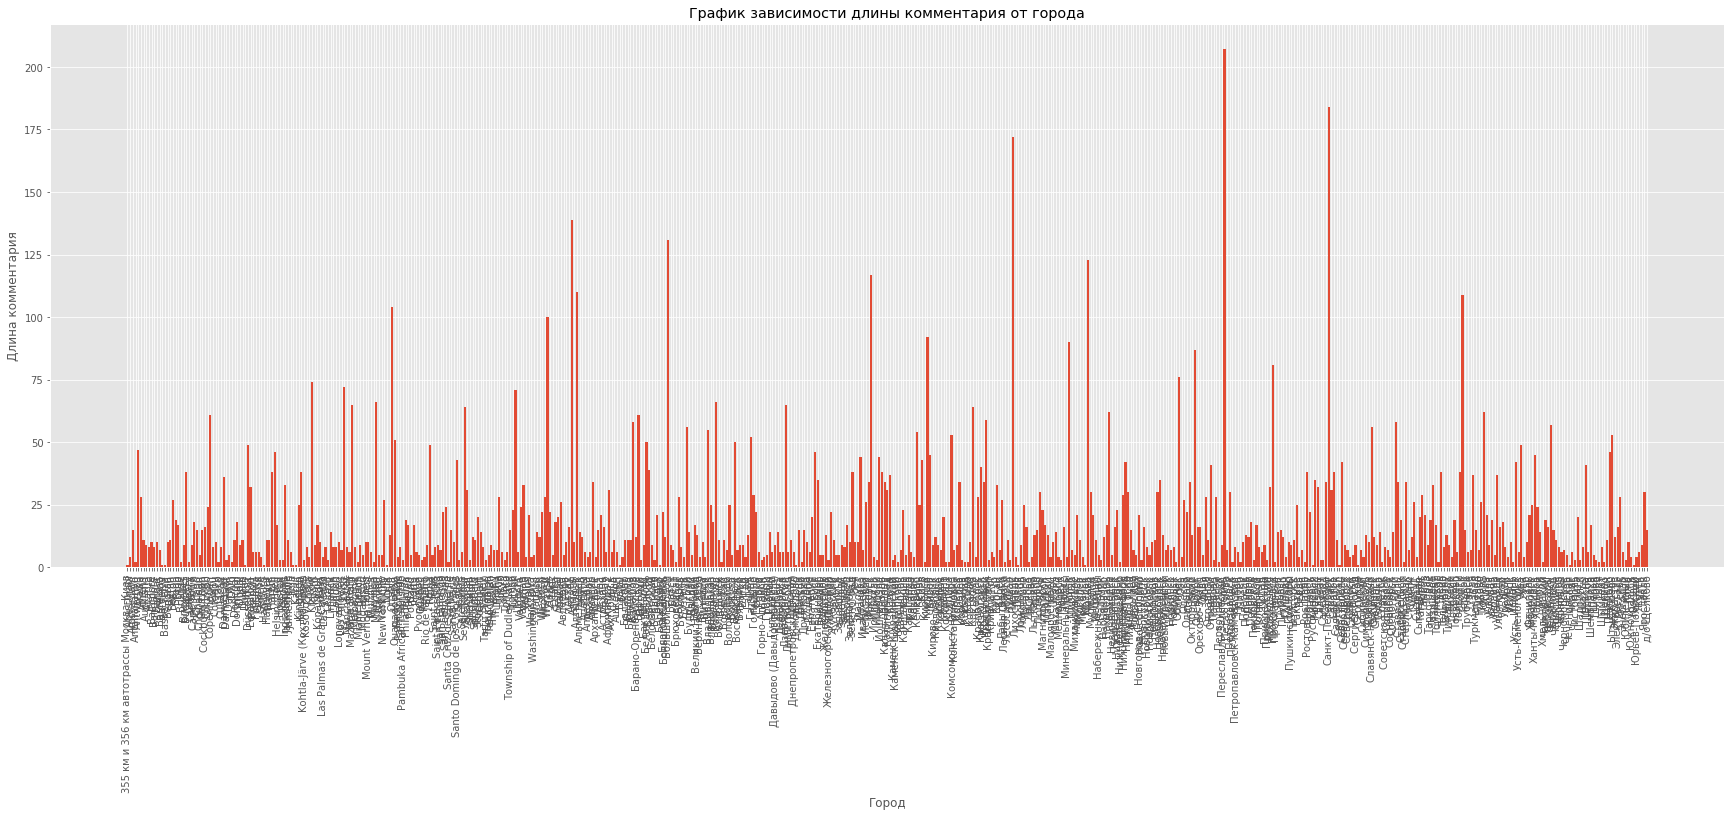

In [83]:
x = []
y = []

for k,v in comm_city.items():
    length = len(k.split())
    y.append(length)
    x.append(v)
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title ('График зависимости длины комментария от города')
plt.ylabel('Длина комментария')
plt.xlabel('Город')
plt.bar(x,y)
plt.savefig('graph_comm_city.png', format='png', dpi=100)

In [84]:
j = 0
post_age = {}
post_city = {}
ages = set()
cities = set()
for k, v in post_id.items():
    try:
        req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-42923159&count=200&offset={}&v=5.74&post_id={}&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j,v)) 
        while req:
            response = urllib.request.urlopen(req) 
            result = response.read().decode('utf-8')
            data1 = json.loads(result) 
            for i in range(200): 
                post_comm_id = data1 ['response'] ['items'] [i] ['from_id']
                req = urllib.request.Request('https://api.vk.com/method/users.get?user_id={}&fields=bdate,city&v=5.74&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(post_comm_id)) 
                response = urllib.request.urlopen(req) 
                result = response.read().decode('utf-8')
                data2 = json.loads(result) 
                try: 
                    if 'bdate' in data2 ['response'] [0]: 
                        b = data2 ['response'] [0] ['bdate'].split('.')
                        age = 2018-int(b[2])
                        ages.add(age)
                except:  
                    continue
                try: 
                    if 'city' in data2 ['response'] [0]: 
                        city = data2 ['response'] [0] ['city'] ['title']
                        cities.add(city)
                except: 
                    continue
            j += 100
            req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-42923159&count=200&offset={}&v=5.74&post_id={}&access_token=6a55acda6a55acda6a55acda4e6a37d82d66a556a55acda308280a77c5ac9731d8227d8'.format(j,v)) 
    except:
        post_age [k] = ages
        post_city [k] = cities
        j = 0
        ages = set()
        cities = set()

In [87]:
age_sr_post = {}
for k,v in post_age.items():
    for age in v: 
        if age not in age_sr_post:
            dlina = 0
            kolko = 0
            for key, value in post_age.items(): 
                for a in value: 
                    if  age == a: 
                        kolko += 1
                        dlina += len(k.split())
                        break 
                    else: 
                        continue
                    
            age_sr_post[age] = dlina//kolko

In [88]:
city_sr_post = {}
for k,v in post_city.items():
    for city in v: 
        if city not in city_sr_post:
            dlina = 0
            kolko = 0
            for key, value in post_city.items(): 
                for c in value: 
                    if  city == c: 
                        kolko += 1
                        dlina += len(k.split())
                        break 
                    else: 
                        continue
                
            city_sr_post[city] = dlina//kolko

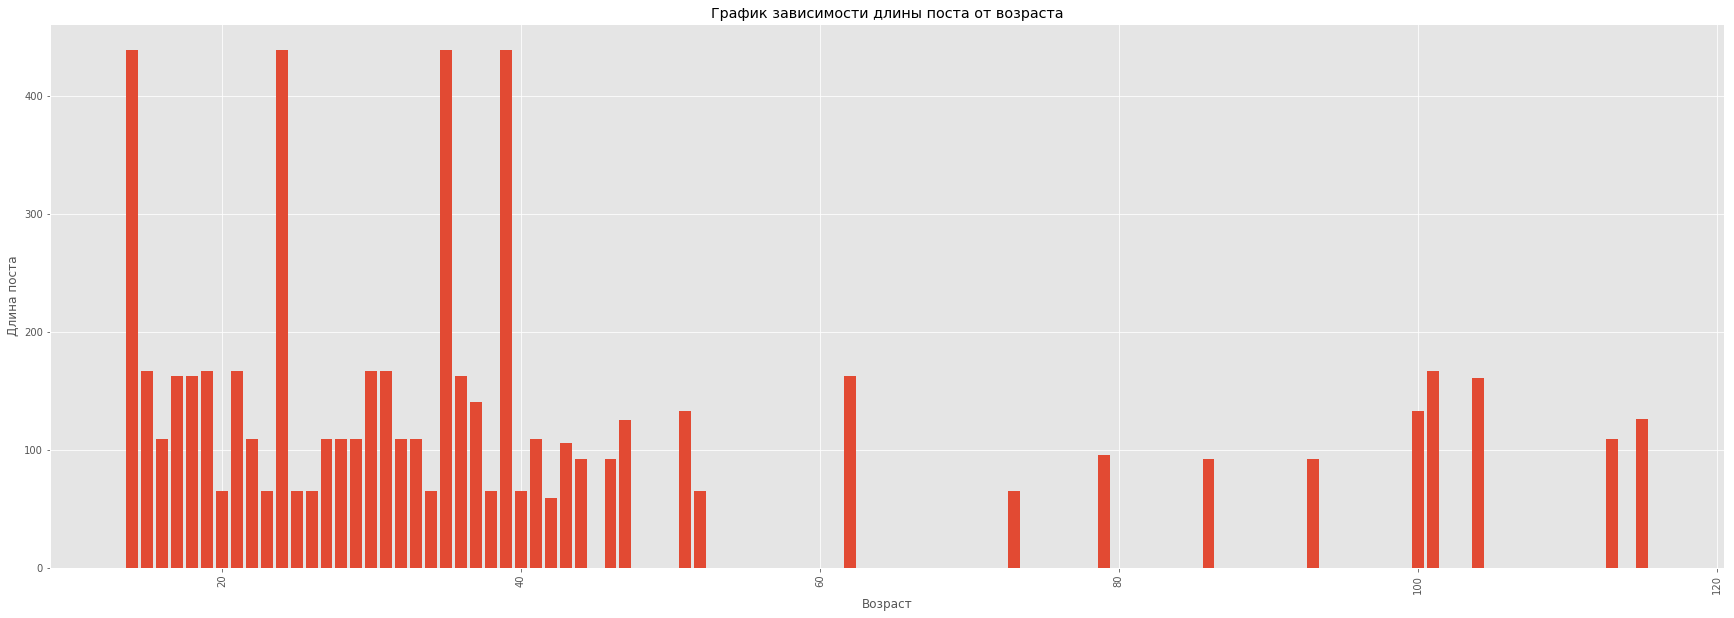

In [71]:
x = []
y = []

for k,v in age_sr_post.items():
    x.append(k)
    y.append(v)
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title ('График зависимости длины поста от возраста')
plt.xlabel('Возраст')
plt.ylabel('Длина поста')
plt.bar(x,y)
plt.savefig('graph_age_sr_post.png', format='png', dpi=100)

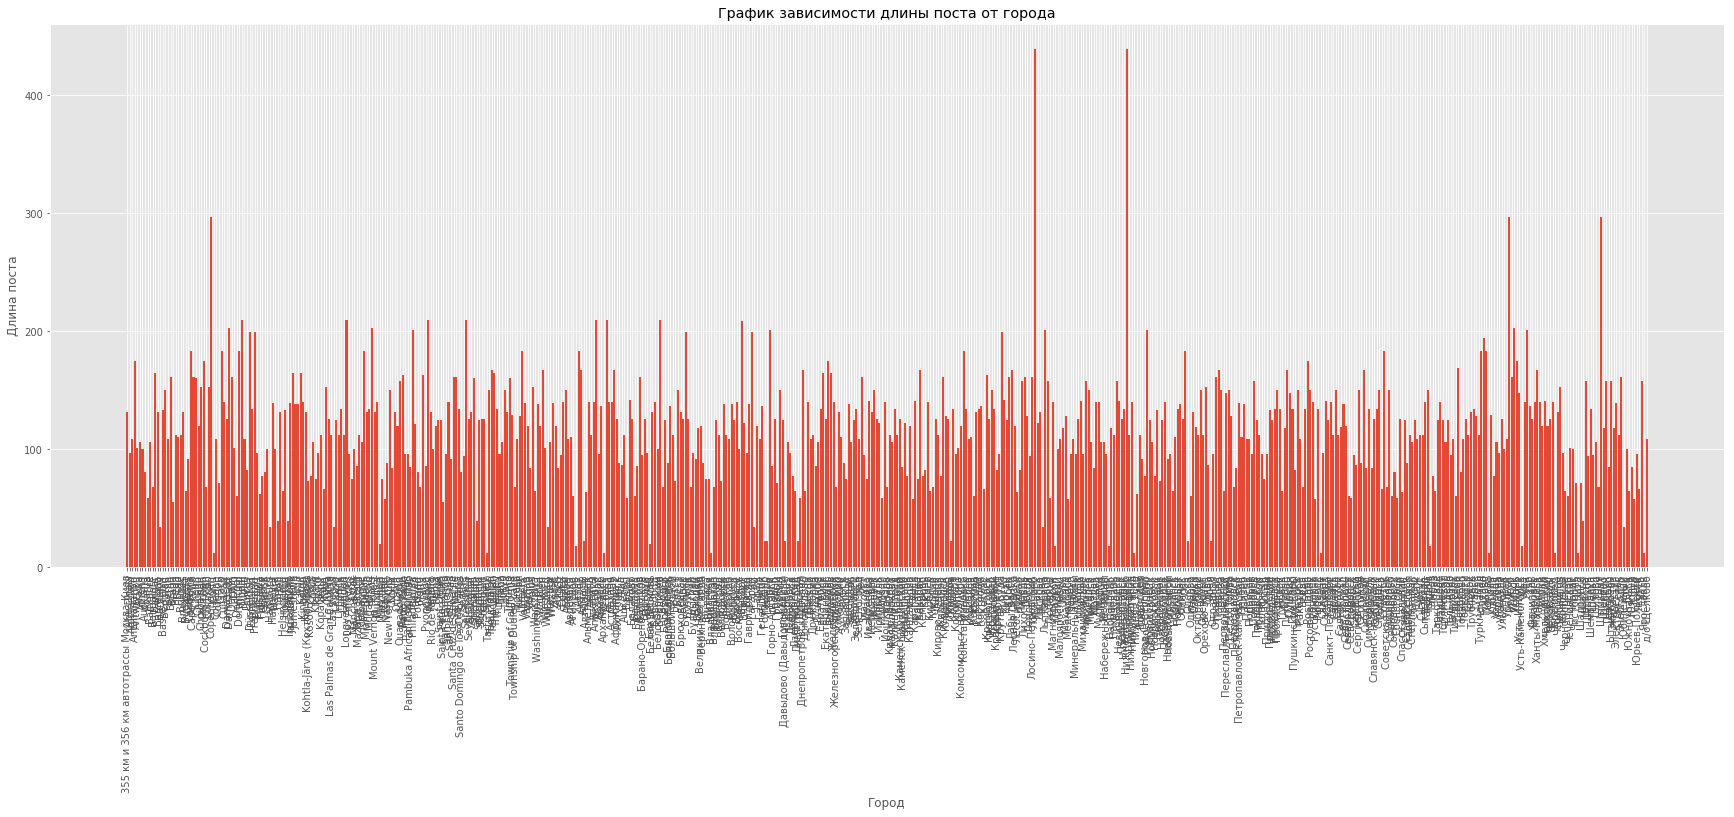

In [90]:
x = []
y = []

for k,v in city_sr_post.items():
    x.append(k)
    y.append(v)
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title ('График зависимости длины поста от города')
plt.xlabel('Город')
plt.ylabel('Длина поста')
plt.bar(x,y)
plt.savefig('graph_city_sr_post.png', format='png', dpi=100)